<a href="https://colab.research.google.com/github/Satyendra0207/NLP/blob/main/case_study_1_Restaurents_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Restaurant_Reviews.tsv",sep='\t')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
text=''.join(df.Review)
text

'Wow... Loved this place.Crust is not good.Not tasty and the texture was just nasty.Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.The selection on the menu was great and so were the prices.Now I am getting angry and I want my damn pho.Honeslty it didn\'t taste THAT fresh.)The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.The fries were great too.A great touch.Service was very prompt.Would not go back.The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!I was disgusted because I was pretty sure that was human hair.I was shocked because no signs indicate cash only.Highly recommended.Waitress was a little slow in service.This place is not worth your time, let alone Vegas.did not like at all.The Burrittos Blah!The food, amazing.Service is also cute.I could care less... The interior is 

In [ ]:
text_1=' '.join(df.Review.tolist())
text_1

'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

# Text Pre-Processing

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
text=text.lower()
token=word_tokenize(text) # tokenizing the words
stop_words=stopwords.words('english') #list of stopwords 
punct=list(string.punctuation)#punctuation list 
stop_punct=stop_words+punct #combining both

#loop to filtered the original text
filtered_tokens= [word for word in token if word not in (stop_punct +["'s","n't","..."])]

In [ ]:
freq=FreqDist(filtered_tokens)
print("Most Common words in the Review \n",freq.most_common(10))

Most Common words in the Review 
 [('food', 99), ('place', 86), ('good', 68), ('service', 56), ('great', 49), ('like', 45), ('go', 41), ('back', 41), ('time', 36), ('really', 36)]


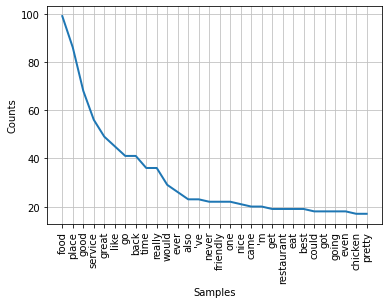

In [ ]:
freq.plot(30,cumulative=False)

# word cloud

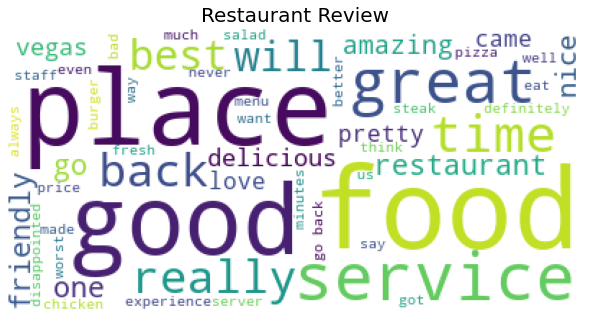

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

def word_cloud(title_, text):
    """ Create WorldCloud """
    stopword_list = set(STOPWORDS) 

    wordcloud = WordCloud(width = 400, height = 200, 
                    background_color ='white', 
                    stopwords = stopword_list, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title_, fontsize=20)
    plt.show() 

word_cloud("Restaurant Review",text)

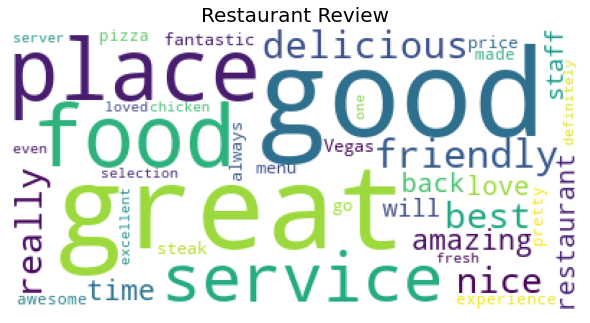

In [ ]:
#Positive Reviews 
positive=''.join(df[df.Liked==1].Review.tolist())
word_cloud("Restaurant Review",positive)

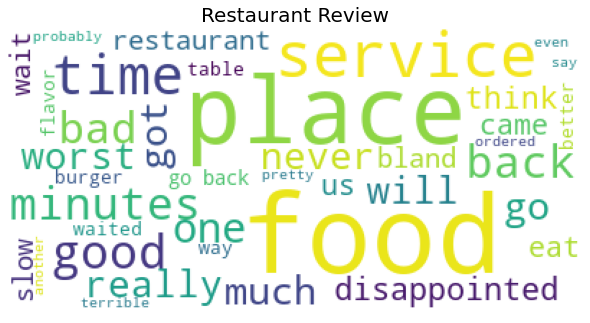

In [ ]:
#Negative Reviews
negative=''.join(df[df.Liked==0].Review.tolist())
word_cloud("Restaurant Review",negative)

##**Feature Extraction**

### using BOW(Bag of Words)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#CountVectorizer -- Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer(lowercase=True,                #check for lowercase 
                     stop_words='english',          #check for stopwords
                     ngram_range = (1,1),           #implement n_gram value 
                     tokenizer = token.tokenize)    #remove regular expressions

text_counts = cv.fit_transform(df['Review'])  #fitting and transforming the data 

In [ ]:
text_counts.toarray() #conversion to an array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv.get_feature_names() #will returns the names of column/feature(names of all the words in the review file)

In [ ]:
##creating data frame using the extracted features and the array
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_df.shape

(1000, 1834)

###Training the model as per feature engineering

In [ ]:
#spliting the data in testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    df['Liked'], 
                                                    test_size = 0.3, 
                                                    random_state = 1)#random state to make split same every run of code (it constants the split )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd

results = pd.DataFrame(columns = ['Classifier','Accuracy', 'Precision', 'Recall', 'F1-Score'])


classifiers = [RandomForestClassifier(),
               LogisticRegression(),
               MultinomialNB(),
               MLPClassifier(),
               DecisionTreeClassifier(),
              SVC(),
              AdaBoostClassifier()]

for clf in classifiers:
    # Fit the model
    clf.fit(X_train, y_train)
    #Make predictions    
    y_pred = clf.predict(X_test)

    acc, pre, rc = metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    results = results.append({'Classifier':str(clf)[:-2],
                              'Accuracy':acc, 
                              'Precision':pre, 
                              'F1-Score':f1,
                              'Recall':rc}, ignore_index = True)

In [ ]:
results

,Classifier,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.750000,0.731884,0.726619,0.729242
1,LogisticRegression,0.756667,0.729167,0.755396,0.742049
2,MultinomialNB,0.733333,0.678788,0.805755,0.736842
3,MLPClassifier,0.743333,0.701299,0.776978,0.737201
4,DecisionTreeClassifier,0.676667,0.677966,0.575540,0.622568
5,SVC,0.753333,0.773109,0.661871,0.713178
6,AdaBoostClassifier,0.760000,0.845361,0.589928,0.694915


0.7483801778453013


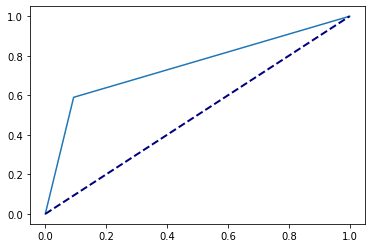

In [ ]:
fpr, tpr, thresholds =  metrics.roc_curve(y_test, y_pred)

print(metrics.auc(fpr, tpr))
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

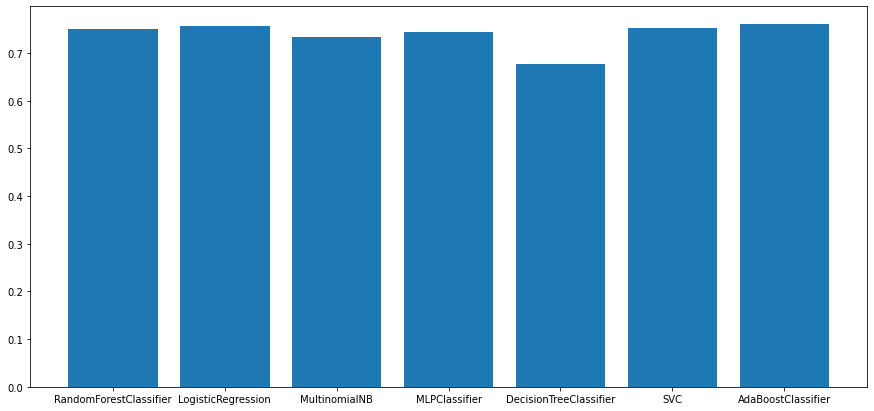

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(results['Classifier'],results['Accuracy'])
plt.show()
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

##using TF-IDF(term frequnecy -Inverse Document freqency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#CountVectorizer -- Convert a collection of text documents to a matrix of token counts.
tfidf = TfidfVectorizer(lowercase=True,                #check for lowercase 
                     stop_words='english',          #check for stopwords
                     ngram_range = (1,1),           #implement n_gram value 
                     tokenizer = token.tokenize)    #remove regular expressions

text_mat = tfidf.fit_transform(df['Review'])

In [ ]:
text_mat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
##creating data frame using the extracted features and the array
count_tfidf = pd.DataFrame(text_mat.toarray(),columns=cv.get_feature_names())
count_tfidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#spliting the data in testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_mat, 
                                                    df['Liked'], 
                                                    test_size = 0.3, 
                                                    random_state = 1)#random state to make split same every run of code (it constants the split )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd

results = pd.DataFrame(columns = ['Classifier','Accuracy', 'Precision', 'Recall', 'F1-Score'])


classifiers = [RandomForestClassifier(),
               LogisticRegression(),
               MultinomialNB(),
               MLPClassifier(),
               DecisionTreeClassifier(),
              SVC(),
              AdaBoostClassifier()]

for clf in classifiers:
    # Fit the model
    clf.fit(X_train, y_train)
    #Make predictions    
    y_pred = clf.predict(X_test)

    acc, pre, rc = metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    results = results.append({'Classifier':str(clf)[:-2],
                              'Accuracy':acc, 
                              'Precision':pre, 
                              'F1-Score':f1,
                              'Recall':rc}, ignore_index = True)
results

,Classifier,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.756667,0.739130,0.733813,0.736462
1,LogisticRegression,0.756667,0.729167,0.755396,0.742049
2,MultinomialNB,0.720000,0.662722,0.805755,0.727273
3,MLPClassifier,0.746667,0.711409,0.762590,0.736111
4,DecisionTreeClassifier,0.753333,0.764228,0.676259,0.717557
5,SVC,0.770000,0.743056,0.769784,0.756184
6,AdaBoostClassifier,0.736667,0.800000,0.575540,0.669456
